In [19]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

[  0.           4.04040404   8.08080808  12.12121212  16.16161616
  20.2020202   24.24242424  28.28282828  32.32323232  36.36363636
  40.4040404   44.44444444  48.48484848]
[  1.00000000e+02   4.43025189e+00   7.79297460e-02   1.37081211e-03
   2.41137608e-05   4.24435515e-07   7.49358543e-09   1.54587239e-10
   2.34287703e-08   1.89964057e+00   3.34153742e-02   5.87787283e-04
   1.03398510e-05]
[  1.50000000e+02   5.37742890e-10   2.94982647e-10   1.55336273e-08
   8.81918480e-07   5.01761526e-05   2.85354948e-03   1.62224492e-01
   9.22235391e+00   7.07684419e-11   6.37388370e-10   3.50649534e-08
   1.99240435e-06]


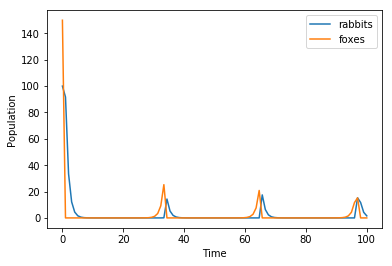

In [20]:
# Example solution

# A
# Between time = 0 and time = 100
ts = np.linspace(0, 100, 100)

a,b,c,d = 1,1,1,1

# Define function that returns differential 
def dP_dt(P, t):
    
    return [P[0]*(a - b*P[1]), 
           -P[1]*(c - d*P[0])]

# Initial conditions
P0 = [150, 100]

# Solve using odeint
Ps = odeint(dP_dt, P0, ts)


# B 
# plot the two populations using a graph
foxes = Ps[:,0]
rabbits = Ps[:,1]

plt.plot(ts, rabbits, label="rabbits")
plt.plot(ts, foxes,label="foxes")

t = ts[0:50:4]
r = rabbits[0:50:4]
f = foxes[0:50:4]

plt.xlabel("Time")
plt.ylabel("Population")
# Include a legend
plt.legend();

print(t)
print(r)
print(f)

In [21]:
tspan = [0, 0.1, 0.2, 0.4, 0.8, 1]
Ca_data = [2.0081, 1.5512, 1.1903, 0.7160, 0.2562, 0.1495]

def fitfunc(t, k):
    
    "Function that returns Ca computed from an ODE for a k"
    def myode(Ca, t):
        return -k * Ca

    Ca0 = Ca_data[0]
    Casol = odeint(myode, Ca0, t)
    return Casol[:,0]



[  1.           0.95451169   0.91872594   0.89216492   0.87437429
   0.86492216   0.86339779   0.86941076   0.88258983   0.90258207
   0.92905193   0.96168039   1.00016413   1.04421474   1.09355806
   1.14793344   1.20709305   1.27080125   1.33883402   1.41097837
   1.4870318    1.56680178   1.65010528   1.73676827   1.82662527
   1.919519     2.01529987   2.11382572   2.21496133   2.31857817
   2.42455406   2.53277279   2.6431239    2.75550239   2.86980838
   2.98594696   3.10382787   3.22336529   3.34447765   3.46708737
   3.59112071   3.71650755   3.84318123   3.97107837   4.10013872
   4.23030499   4.36152271   4.49374011   4.62690795   4.76097939
   4.89590996   5.03165733   5.16818128   5.30544355   5.4434078
   5.58203943   5.72130559   5.86117502   6.00161802   6.14260633
   6.28411309   6.42611278   6.56858111   6.711495     6.85483252
   6.99857279   7.14269598   7.28718323   7.43201661   7.57717907
   7.72265441   7.86842722   8.01448284   8.16080735   8.3073875
   8.4542107

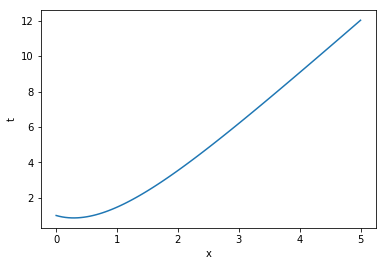

In [24]:
ts = np.linspace(0,5,100) # the value(s) of t at which to evaluate x
x0 = 1.0                  # the initial value
k = 3

def dx_dt(x,t):
    return k*t - x

# odeint returns x at each value of t
xs = odeint(dx_dt, x0, ts)

xs = np.array(xs).flatten()
plt.xlabel("x")
plt.ylabel("t")
plt.plot(ts, xs);

print(xs)

XS = xs
TS = ts

In [35]:
tspan = ts
Ca_data = xs

def fitfunc(t, k):
    "Function that returns Ca computed from an ODE for a k"
    def myode(Ca, t):
        return -k * Ca

    Ca0 = Ca_data[0]
    Casol = odeint(myode, Ca0, t)
    return Casol[:,0]

k_fit, kcov = curve_fit(fitfunc, tspan, Ca_data, p0=1.3)
print(k_fit)

tfit = np.linspace(0,1);
fit = fitfunc(tfit, k_fit)

[ 3.]


In [39]:
ts = np.linspace(0,5,100) # the value(s) of t at which to evaluate x
x0 = 1.0                  # the initial value
k = 3

def dx_dt(x,t):
    return -k * x

# odeint returns x at each value of t
xs = odeint(dx_dt, x0, ts)
xs = xs[:,0]

XS = xs
TS = ts

print(XS.shape)
print(TS.shape)

def fitfunc(t, k):
    
    "Function that returns Ca computed from an ODE for a k"
    def dx_dt(x, t):
        return -k * x

    X0 = X[0]
#     print(X0)
    xs = odeint(dx_dt, X0, t)
    return xs[:,0]
#     return np.array(xs).flatten()

k_fit, kcov = curve_fit(fitfunc, TS, XS)

print(k_fit)

tfit = np.linspace(0,1);
fit = fitfunc(tfit, k_fit)

(100,)
(100,)
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[ 3.]
1.0


In [44]:
ts = np.linspace(0, 100, 100)
P0 = [150, 100]                 # the initial value
a, b, c, d = 1, 1, 1, 1

def dP_dt(P,t):
    return [P[0]*(a - b*P[1]), 
           -P[1]*(c - d*P[0])]

# odeint returns x at each value of t
Ps = odeint(dP_dt, P0, ts)
foxes = Ps[:,0]
rabbits = Ps[:,1]

PS = Ps
FS = foxes
RS = rabbits
TS = ts

print(TS.shape)
print(PS.shape)


def fitfunc(t, a, b, c):
    
    "Function that returns Ca computed from an ODE for k"
    def dP_dt(P,t):
        return [P[0]*(a - b*P[1]), 
               -P[1]*(c - d*P[0])]

    P = odeint(dP_dt, P0, t)
    return P[:,0], P[:,1]

k_fit, kcov = curve_fit(fitfunc, TS, PS)

print(k_fit)

tfit = np.linspace(0,1);
fit = fitfunc(tfit, k_fit)

(100,)
(100, 2)


ValueError: operands could not be broadcast together with shapes (2,100) (100,2) 

In [ ]:
### COPIED FROM https://stackoverflow.com/questions/42981930/how-to-solve-a-system-of-odes-with-scipy-integrate-odeint-with-a-time-dependent
# The green dots are sampled from the solution of the ODE system you provided. To mimic measurement errors, I added some noise to those data (blue dots). Then you can fit your ODE system to reproduce these data as good as possible (red line).

# For these tasks you can use lmfit. The code that reproduces the plot looks like this (some explanation can be found in the inline comments):

# zombie apocalypse modeling
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint


# solve the system dy/dt = f(y, t)
def f(y, t, paras):

    Si = y[0]
    Zi = y[1]
    Ri = y[2]

    try:
        P = paras['P'].value
        d = paras['d'].value
        B = paras['B'].value
        G = paras['G'].value
        A = paras['A'].value

    except:
        P, d, B, G, A = paras
    # the model equations (see Munz et al. 2009)
    f0 = P - B * Si * Zi - d * Si
    f1 = B * Si * Zi + G * Ri - A * Si * Zi
    f2 = d * Si + A * Si * Zi - G * Ri
    return [f0, f1, f2]


def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,p) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):
    x0 = paras['S0'].value, paras['Z0'].value, paras['R0'].value
    model = g(t, x0, paras)
    s_model = model[:, 0]
    return (s_model - data).ravel()

# just for reproducibility reasons
np.random.seed(1)

# initial conditions
S0 = 500.              # initial population
Z0 = 0                 # initial zombie population
R0 = 0                 # initial death population
y0 = [S0, Z0, R0]     # initial condition vector
t = np.linspace(0, 5., 100)         # time grid

P = 12      # birth rate
d = 0.0001  # natural death percent (per day)
B = 0.0095  # transmission percent  (per day)
G = 0.0001  # resurect percent (per day)
A = 0.0001  # destroy percent  (per day)

# solve the DEs
soln = odeint(f, y0, t, args=((P, d, B, G, A), ))
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

# plot results
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)
plt.show()

# generate fake data
S_real = S[0::8]
S_measured = S_real + np.random.randn(len(S_real)) * 100
t_measured = t[0::8]

plt.figure()
plt.plot(t_measured, S_real, 'o', color='g', label='real data')

# add some noise to your data to mimic measurement erros
plt.plot(t_measured, S_measured, 'o', color='b', label='noisy data')

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
params.add('S0', value=S0, min=490., max=510.)
params.add('Z0', value=Z0, vary=False)
params.add('R0', value=R0, vary=False)
params.add('P', value=10, min=8., max=12.)
params.add('d', value=0.0005, min=0.00001, max=0.005)
params.add('B', value=0.01, min=0.00001, max=0.01)
params.add('G', value=G, vary=False)
params.add('A', value=0.0005, min=0.00001, max=0.001)

# fit model
result = minimize(residual, params, args=(t_measured, S_measured), method='leastsq')  # leastsq nelder
# check results of the fit
data_fitted = g(t, y0, result.params)

plt.plot(t, data_fitted[:, 0], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
# display fitted statistics
report_fit(result)

plt.show()